## Imports ...

In [ ]:
# Fix randomness and hide warnings
seed = 52

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['MPLCONFIGDIR'] = os.getcwd()+'/configs/'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

import numpy as np
np.random.seed(seed)

import logging

import random
random.seed(seed)

# Import tensorflow
import tensorflow as tf
from tensorflow import keras as tfk
from keras import layers as tfkl
tf.autograph.set_verbosity(0)
tf.get_logger().setLevel(logging.ERROR)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)
print(tf.__version__)
print(np.__version__)


# Import other libraries
import pandas as pd

print(pd.__version__)
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', size=16)
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

2.14.0
1.26.1
2.1.2


## Data Loading

In [ ]:
#Loading the image set with numpi

dataset = np.load('public_data.npz', allow_pickle = True)
data = np.array(dataset['data']).astype(int)

print(data)
labels = np.array(dataset['labels'])

print("The shape of the inputs is: ", data.shape)
print("The shape of the labels is: ", labels.shape)

[[[[ 20  38   0]
   [ 44  62  22]
   [151 173 127]
   ...
   [177 220 149]
   [180 224 149]
   [181 225 148]]

  [[ 18  35   1]
   [ 12  29   0]
   [ 85 106  65]
   ...
   [177 220 149]
   [179 223 148]
   [179 223 146]]

  [[ 12  23   6]
   [  9  22   2]
   [  1  17   0]
   ...
   [171 213 147]
   [170 213 142]
   [170 213 141]]

  ...

  [[  3  13   2]
   [  6  16   5]
   [ 11  18  10]
   ...
   [101 139  82]
   [ 83 115  66]
   [ 81 113  64]]

  [[  6  17   0]
   [  8  19   2]
   [ 15  23   8]
   ...
   [ 87 125  68]
   [ 98 130  80]
   [ 90 122  73]]

  [[  6  18   0]
   [  8  20   0]
   [ 19  27  12]
   ...
   [ 79 117  60]
   [106 138  88]
   [101 133  84]]]


 [[[ 94 125  83]
   [ 46  79  34]
   [ 62 103  47]
   ...
   [129 178 133]
   [125 174 127]
   [124 173 126]]

  [[ 67  98  56]
   [ 31  64  19]
   [ 57  98  42]
   ...
   [129 177 135]
   [129 178 133]
   [130 179 134]]

  [[  1  32   0]
   [  0  30   0]
   [ 53  94  38]
   ...
   [139 185 149]
   [135 181 144]
   [134 180

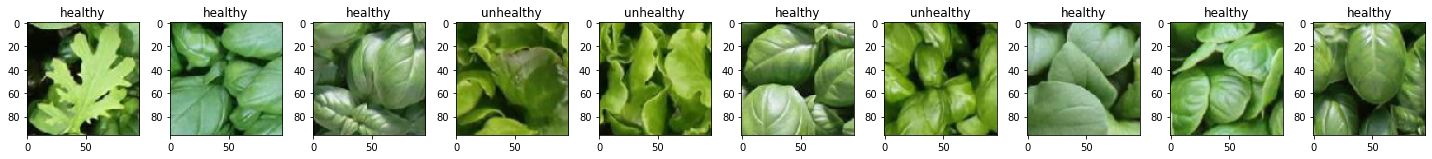

In [ ]:
# Display a sample of images from the dataset
num_img = 10
fig, axes = plt.subplots(1, num_img, figsize=(20, 20))

# Iterate through the selected number of images
for i in range(num_img):
    ax = axes[i % num_img]
    ax.imshow(data[i])
    ax.set_title(f'{labels[i]}')  # Show the corresponding digit label

# Adjust layout and display the images
plt.tight_layout()
plt.show()

## Data processing

In [ ]:
labels = pd.DataFrame(labels)
labels.describe()


,0
count,5200
unique,2
top,healthy
freq,3199


In [ ]:
# Turning the classes into a binary coding 00:Unhealthy, 01:Healthy
unique = labels.iloc[: , 0].unique()
print(unique)

loc = [1,2]
for pos in zip(loc , unique):
    labels.insert(pos[0] , pos[1] , pos[0] - 1)




['healthy' 'unhealthy']


In [ ]:
labels_1 = labels
labels_1.loc[labels[0] == 'healthy' , 'healthy'] = 1
labels_1.loc[labels[0] == 'healthy', 'unhealthy'] = 0


labels_1.head(10)

,0,healthy,unhealthy
0,healthy,1,0
1,healthy,1,0
2,healthy,1,0
3,unhealthy,0,1
4,unhealthy,0,1
5,healthy,1,0
6,unhealthy,0,1
7,healthy,1,0
8,healthy,1,0
9,healthy,1,0


In [ ]:
labels = labels_1
labels = labels.drop(columns = 0)
labels.head(50)

,healthy,unhealthy
0,1,0
1,1,0
2,1,0
3,0,1
4,0,1
5,1,0
6,0,1
7,1,0
8,1,0
9,1,0


In [ ]:
# Split the data into training, validation and testing

# Split data into train_val and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(data, labels, random_state=seed, test_size=.25, stratify=np.argmax(labels,axis=1))

# Further split train_val into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, random_state=seed, test_size=len(X_test), stratify=np.argmax(y_train_val,axis=1))


In [ ]:
# Print shapes of the datasets
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (2600, 96, 96, 3), y_train shape: (2600, 2)
X_val shape: (1300, 96, 96, 3), y_val shape: (1300, 2)
X_test shape: (1300, 96, 96, 3), y_test shape: (1300, 2)


## Model building

In [ ]:
input_shape = X_train.shape[1:]
output_shape = y_train.shape[1]


print('The input of the network has shape: ', input_shape)
print('The output of the network has shape: ', output_shape )

batch_size = 100
epochs = 200

The input of the network has shape:  (96, 96, 3)
The output of the network has shape:  2


In [ ]:
def build_basic_model(
    input_shape,
    output_shape,
    seed = seed
):
    tf.random.set_seed(seed)

    input_layer = tfkl.Input(shape = input_shape, name = 'Input')

    conv1 = tfkl.Conv2D(
        filters = 6,
        kernel_size = (3,3),
        padding = 'same',
        activation = 'relu',
        name = 'conv1'
    )(input_layer)

    pool1 = tfkl.MaxPool2D(
        pool_size = (2,2),
        name = 'mp1'
    )(conv1)

    conv2 = tfkl.Conv2D(
        filters = 16,
        kernel_size = (2,2),
        padding = 'same',
        activation = 'relu',
        name = 'conv2'
    )(pool1)

    pool2 = tfkl.MaxPool2D(
        pool_size = (2,2),
        name = 'mp2'
    )(conv2)

    conv3 = tfkl.Conv2D(
        filters = 30,
        kernel_size = (2,2),
        padding = 'same',
        activation = 'relu',
        name = 'conv3'
    )(pool2)

    pool3 = tfkl.MaxPool2D(
        pool_size = (3,3),
        name = 'mp3'
    )(conv3)

    conv4 = tfkl.Conv2D(
        filters = 50,
        kernel_size = (3,3),
        padding = 'same',
        activation = 'relu',
        name = 'conv4'
    )(pool3)

    pool4 = tfkl.GlobalAveragePooling2D(

    )(conv4)

    flattening_layer=tfkl.Flatten(
        name='flatten'
    )(pool4)

    classifier_layer=tfkl.Dense(
        units=120,
        activation='relu',
        name='dense1'
    )(flattening_layer)

    classifier_layer = tfkl.Dense(
        units=84,
        activation='relu',
        name='dense2'
    )(classifier_layer)

    output_layer = tfkl.Dense(
        units=output_shape,
        activation='sigmoid',
        name='Output'
    )(classifier_layer)

    # Connect input and output through the Model class
    model = tfk.Model(inputs=input_layer, outputs=output_layer, name='BasicModel')

    # Compile the model
    model.compile(loss=tfk.losses.BinaryCrossentropy(), optimizer=tfk.optimizers.Adam(), metrics=['accuracy'])

    # Return the model
    return model








In [ ]:
# Build the model and display its summary
model = build_basic_model(input_shape, output_shape)
model.summary()
tfk.utils.plot_model(model,show_shapes = True, expand_nested=True)

Model: "BasicModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 96, 96, 3)]       0         
                                                                 
 conv1 (Conv2D)              (None, 96, 96, 6)         168       
                                                                 
 mp1 (MaxPooling2D)          (None, 48, 48, 6)         0         
                                                                 
 conv2 (Conv2D)              (None, 48, 48, 16)        400       
                                                                 
 mp2 (MaxPooling2D)          (None, 24, 24, 16)        0         
                                                                 
 conv3 (Conv2D)              (None, 24, 24, 30)        1950      
                                                                 
 mp3 (MaxPooling2D)          (None, 8, 8, 30)          0

## Model training

In [ ]:
# Define early stopping callback
early_stopping = tfk.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, mode='max', restore_best_weights=True)

# Train the model and save its history
history = model.fit(
    x=X_train,
    y=y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping]
).history



Epoch 1/200
26/26 [==============================] - 3s 82ms/step - loss: 0.9587 - accuracy: 0.5577 - val_loss: 0.6747 - val_accuracy: 0.6154
Epoch 2/200
26/26 [==============================] - 2s 74ms/step - loss: 0.6741 - accuracy: 0.5996 - val_loss: 0.6530 - val_accuracy: 0.6154
Epoch 3/200
26/26 [==============================] - 2s 77ms/step - loss: 0.6557 - accuracy: 0.6146 - val_loss: 0.6479 - val_accuracy: 0.6146
Epoch 4/200
26/26 [==============================] - 2s 73ms/step - loss: 0.6512 - accuracy: 0.6088 - val_loss: 0.6815 - val_accuracy: 0.6154
Epoch 5/200
26/26 [==============================] - 2s 73ms/step - loss: 0.6685 - accuracy: 0.6254 - val_loss: 0.6432 - val_accuracy: 0.6162
Epoch 6/200
26/26 [==============================] - 2s 73ms/step - loss: 0.6364 - accuracy: 0.6419 - val_loss: 0.6277 - val_accuracy: 0.6662
Epoch 7/200
26/26 [==============================] - 2s 70ms/step - loss: 0.6455 - accuracy: 0.6212 - val_loss: 0.6304 - val_accuracy: 0.6169
Epoch 

In [ ]:
# Save the trained model
model.save('BasicModel.keras')

## Inference

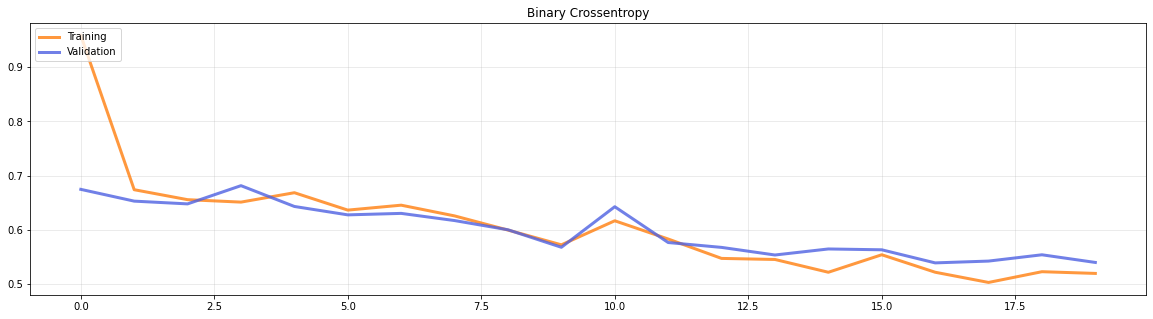

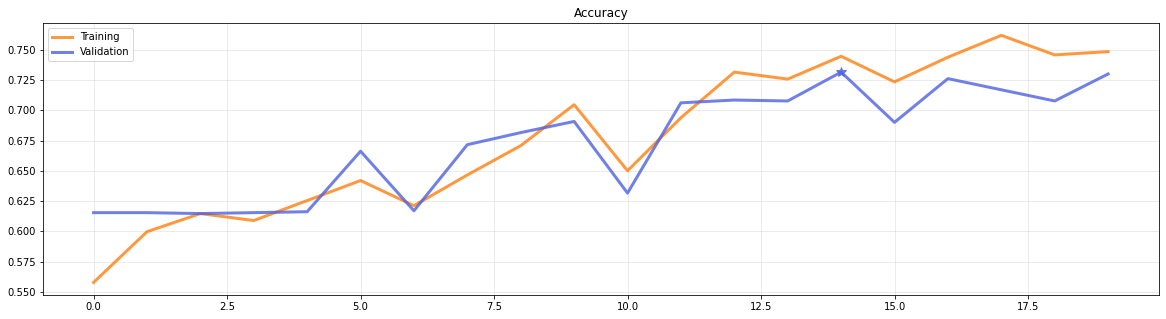

In [ ]:
# Find the epoch with the highest validation accuracy
best_epoch = np.argmax(history['val_accuracy'])

# Plot training and validation performance metrics
plt.figure(figsize=(20, 5))

# Plot training and validation loss
plt.plot(history['loss'], label='Training', alpha=0.8, color='#ff7f0e', linewidth=3)
plt.plot(history['val_loss'], label='Validation', alpha=0.8, color='#4D61E2', linewidth=3)
plt.legend(loc='upper left')
plt.title('Binary Crossentropy')
plt.grid(alpha=0.3)

plt.figure(figsize=(20, 5))

# Plot training and validation accuracy, highlighting the best epoch
plt.plot(history['accuracy'], label='Training', alpha=0.8, color='#ff7f0e', linewidth=3)
plt.plot(history['val_accuracy'], label='Validation', alpha=0.8, color='#4D61E2', linewidth=3)
plt.plot(best_epoch, history['val_accuracy'][best_epoch], marker='*', alpha=0.8, markersize=10, color='#4D61E2')
plt.legend(loc='upper left')
plt.title('Accuracy')
plt.grid(alpha=0.3)

plt.show()

In [ ]:
# Delete the model instance to free up memory
del model

## Model Inspection

In [ ]:
model = tfk.models.load_model('BasicModel.keras')

# Extract activations from the first convolutional layer for a subset of test images
num_images = 200
first_conv = tfk.Sequential(model.layers[:2])
first_activations = first_conv(X_test[0:num_images])

# Extract activations from the second convolutional layer for the same subset of test images
second_conv = tfk.Sequential(model.layers[:4])
second_activations = second_conv(X_test[0:num_images])

# Extract activations from the third convolutional layer for a subset of test images

third_conv = tfk.Sequential(model.layers[:6])
third_activations = third_conv(X_test[0:num_images])


    # """ Extract activations from the fourth convolutional layer for a subset of test images
    # fourth_conv = tfk.Sequential(model.layers[:6])
    # fourth_activations = fourth_conv(X_test[0:num_images])

    # Extract activations from the fifth convolutional layer for a subset of test images

    # fifth_conv = tfk.Sequential(model.layers[:7])
    # fifth_activations = fifth_conv(X_test[0:num_images])  """


[1 0]
Input image


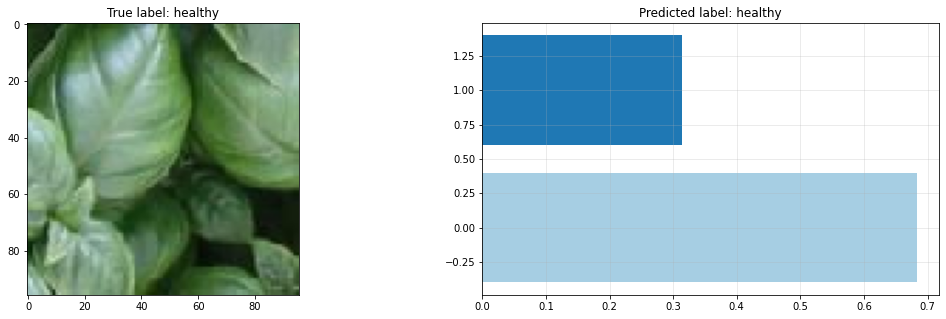

First convolutional activations


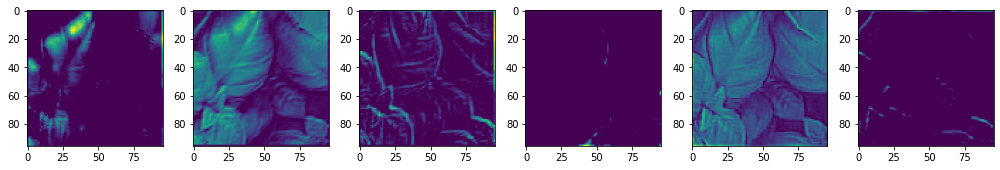

Second convolutional activations


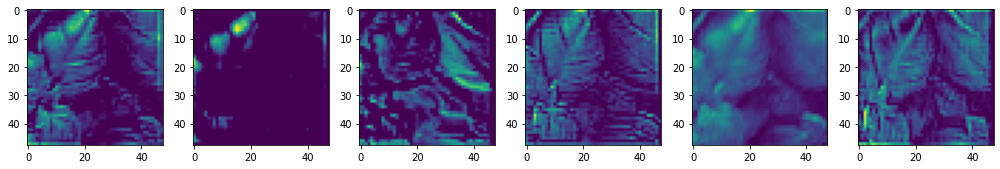

Third convolutional activations


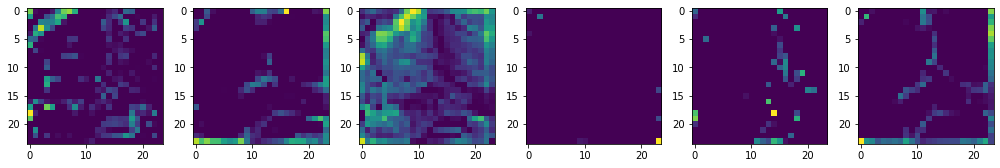

In [ ]:
# Choose a random image for visualization
image = np.random.randint(0, num_images)

y_test = np.array(y_test)

print(y_test[image])

label_list = [0 , 1 ]

def get_key(val):

    if np.array_equal(val , [0,1]):
        return 'unhealthy'
    if np.array_equal(val , [1,0]):
        return 'healthy'
    else:
        return "key doesn't exist"

def get_pred(val):

    if val == 0 : return 'healthy'
    else: return 'unhealthy'




# Display the input image, true label, and predicted label
print('Input image')
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 5)
ax1.imshow(X_test[image])
ax1.set_title('True label: ' + get_key(y_test[image]))
prediction = model.predict(np.expand_dims(X_test[image], axis=0), verbose=0)
ax2.barh(label_list, np.squeeze(prediction, axis=0), color=plt.get_cmap('Paired').colors)
ax2.set_title('Predicted label: ' + get_pred(np.argmax(prediction)))
ax2.grid(alpha=0.3)
plt.show()

# Display activations from the first convolutional layer
print('First convolutional activations')
num_row = 1
num_col = 6
fig, axes = plt.subplots(num_row, num_col, figsize=(14, 12))
for i in range(num_row * num_col):
    ax = axes[i % num_col]
    ax.imshow(first_activations[image, :, :, i])
plt.tight_layout()
plt.show()

# Display activations from the second convolutional layer
print('Second convolutional activations')
num_row = 1
num_col = 6
fig, axes = plt.subplots(num_row, num_col, figsize=(14, 4))
for i in range(num_row * num_col):
    ax = axes[i % num_col]
    ax.imshow(second_activations[image, :, :, i])
plt.tight_layout()
plt.show()

# Display activations from the third convolutional layer
print('Third convolutional activations')
num_row = 1
num_col = 6
fig, axes = plt.subplots(num_row, num_col, figsize=(14, 4))
for i in range(num_row * num_col):
    ax = axes[i % num_col]
    ax.imshow(third_activations[image, :, :, i])
plt.tight_layout()
plt.show()

# # Display activations from the fourth convolutional layer
# print('Fourth convolutional activations')
# num_row = 1
# num_col = 6
# fig, axes = plt.subplots(num_row, num_col, figsize=(14, 4))
# for i in range(num_row * num_col):
#     ax = axes[i % num_col]
#     ax.imshow(fourth_activations[image, :, :, i])
# plt.tight_layout()
# plt.show()

# # Display activations from the fifth convolutional layer
# print('Fifth convolutional activations')
# num_row = 1
# num_col = 6
# fig, axes = plt.subplots(num_row, num_col, figsize=(14, 4))
# for i in range(num_row * num_col):
#     ax = axes[i % num_col]
#     ax.imshow(fifth_activations[image, :, :, i])
# plt.tight_layout()
# plt.show()

## Model Evaluation

In [ ]:
# Predict labels for the entire test set
predictions = model.predict(X_test, verbose=0)
print(predictions)
predictions = np.argmax(predictions , axis = -1)
print(predictions)

# Display the shape of the predictions
print("Predictions Shape:", predictions.shape)


print(y_test)

[[2.8582221e-01 7.2291952e-01]
 [7.8668439e-01 1.6437525e-01]
 [9.9956667e-01 3.3846987e-05]
 ...
 [6.2879080e-01 3.7796381e-01]
 [6.5334886e-02 9.3487465e-01]
 [8.7061930e-01 1.3901474e-01]]
[1 0 0 ... 0 1 0]
Predictions Shape: (1300,)
[[1 0]
 [1 0]
 [1 0]
 ...
 [1 0]
 [0 1]
 [1 0]]


In [ ]:
y_test = np.argmax(y_test, axis = -1)
print(y_test)

[0 0 0 ... 0 1 0]


Accuracy: 0.7354
Precision: 0.7207
Recall: 0.7216
F1: 0.7211


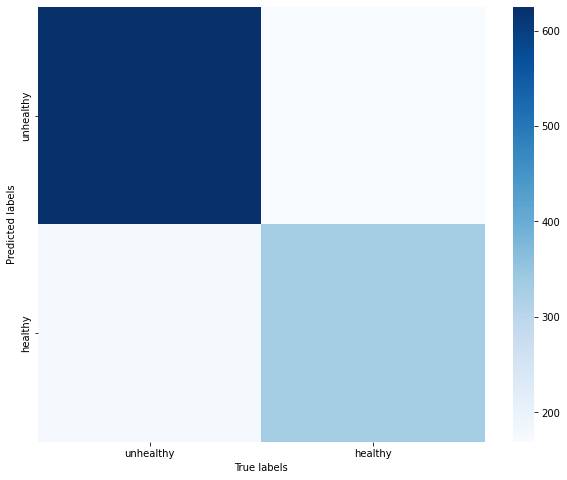

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Compute classification metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='macro')
recall = recall_score(y_test, predictions, average='macro')
f1 = f1_score(y_test, predictions, average='macro')

# Display the computed metrics
print('Accuracy:', accuracy.round(4))
print('Precision:', precision.round(4))
print('Recall:', recall.round(4))
print('F1:', f1.round(4))

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm.T, xticklabels=['unhealthy' , 'healthy'], yticklabels = ['unhealthy' , 'healthy'], cmap='Blues')
plt.xlabel('True labels')
plt.ylabel('Predicted labels')
plt.show()

## Now train the model on all the data ...

In [ ]:
#Loading the image set with numpi

dataset = np.load('public_data.npz', allow_pickle = True)
data = np.array(dataset['data']).astype(int)

print(data)
labels = np.array(dataset['labels'])

print("The shape of the inputs is: ", data.shape)
print("The shape of the labels is: ", labels.shape)

[[[[ 20  38   0]
   [ 44  62  22]
   [151 173 127]
   ...
   [177 220 149]
   [180 224 149]
   [181 225 148]]

  [[ 18  35   1]
   [ 12  29   0]
   [ 85 106  65]
   ...
   [177 220 149]
   [179 223 148]
   [179 223 146]]

  [[ 12  23   6]
   [  9  22   2]
   [  1  17   0]
   ...
   [171 213 147]
   [170 213 142]
   [170 213 141]]

  ...

  [[  3  13   2]
   [  6  16   5]
   [ 11  18  10]
   ...
   [101 139  82]
   [ 83 115  66]
   [ 81 113  64]]

  [[  6  17   0]
   [  8  19   2]
   [ 15  23   8]
   ...
   [ 87 125  68]
   [ 98 130  80]
   [ 90 122  73]]

  [[  6  18   0]
   [  8  20   0]
   [ 19  27  12]
   ...
   [ 79 117  60]
   [106 138  88]
   [101 133  84]]]


 [[[ 94 125  83]
   [ 46  79  34]
   [ 62 103  47]
   ...
   [129 178 133]
   [125 174 127]
   [124 173 126]]

  [[ 67  98  56]
   [ 31  64  19]
   [ 57  98  42]
   ...
   [129 177 135]
   [129 178 133]
   [130 179 134]]

  [[  1  32   0]
   [  0  30   0]
   [ 53  94  38]
   ...
   [139 185 149]
   [135 181 144]
   [134 180

In [ ]:
labels = pd.DataFrame(labels)
labels.describe()

,0
count,5200
unique,2
top,healthy
freq,3199


In [ ]:
# Turning the classes into a binary coding 00:Unhealthy, 01:Healthy
unique = labels.iloc[: , 0].unique()
print(unique)

loc = [1,2]
for pos in zip(loc , unique):
    labels.insert(pos[0] , pos[1] , pos[0] - 1)

labels_1 = labels
labels_1.loc[labels[0] == 'healthy' , 'healthy'] = 1
labels_1.loc[labels[0] == 'healthy', 'unhealthy'] = 0


labels_1.head(10)
labels = labels_1
labels = labels.drop(columns = 0)
labels.head(50)

['healthy' 'unhealthy']


,healthy,unhealthy
0,1,0
1,1,0
2,1,0
3,0,1
4,0,1
5,1,0
6,0,1
7,1,0
8,1,0
9,1,0


In [ ]:
# Split the data into training, validation and testing

# Split data into train_val and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(data, labels, random_state=seed, test_size=.25, stratify=np.argmax(labels,axis=1))

In [ ]:
# Define early stopping callback
early_stopping = tfk.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, mode='max', restore_best_weights=True)

# Train the model and save its history
history = model.fit(
    x=X_train_val,
    y=y_train_val,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
).history

Epoch 1/200
39/39 [==============================] - 3s 74ms/step - loss: 0.5630 - accuracy: 0.7077 - val_loss: 0.5735 - val_accuracy: 0.7046
Epoch 2/200
39/39 [==============================] - 3s 68ms/step - loss: 0.5626 - accuracy: 0.7126 - val_loss: 0.5362 - val_accuracy: 0.7400
Epoch 3/200
39/39 [==============================] - 3s 66ms/step - loss: 0.5248 - accuracy: 0.7472 - val_loss: 0.5799 - val_accuracy: 0.6908
Epoch 4/200
39/39 [==============================] - 3s 70ms/step - loss: 0.5208 - accuracy: 0.7533 - val_loss: 0.5376 - val_accuracy: 0.7377
Epoch 5/200
39/39 [==============================] - 3s 68ms/step - loss: 0.5466 - accuracy: 0.7300 - val_loss: 0.6298 - val_accuracy: 0.6815
Epoch 6/200
39/39 [==============================] - 3s 66ms/step - loss: 0.5326 - accuracy: 0.7428 - val_loss: 0.5170 - val_accuracy: 0.7562
Epoch 7/200
39/39 [==============================] - 3s 67ms/step - loss: 0.4991 - accuracy: 0.7544 - val_loss: 0.5138 - val_accuracy: 0.7569
Epoch 

In [ ]:
# Save the trained model
model.save('Models/Basic_Model/BasicModel.keras')

In [ ]:
# Save the weights
model = tfk.models.load_model('Models/Basic_Model/BasicModel.keras')
model.save_weights('Models/Basic_Model/BasicModelWeights.h5')